# Práctica 2

Primero obtenemos y procesamos los datos con los que vamos a trabajar, comunes a ambos apartados de la práctica. En concreto, obtenemos los textos de entrenamiento y test y los vectorizamos con la frecuencia de aparicion de términos incluidos en el diccionario words.txt dado.

In [1]:
from sklearn.datasets import fetch_20newsgroups

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.metrics.pairwise        import cosine_similarity

In [2]:
# Obtención de los datos de entrenamiento y prueba
train_data = fetch_20newsgroups(subset='train', shuffle=True, random_state=17)
test_data  = fetch_20newsgroups(subset='test',  shuffle=True, random_state=398)

In [3]:
# Lectura del diccionario de palabras
with open('words.txt') as file:
    dictionary = file.read().splitlines()

In [4]:
# Vectorizador de documentos común a los apartados a y b
vectorizer = CountVectorizer(analyzer='word',stop_words='english', binary=False, vocabulary=dictionary, ngram_range=(1,1))

In [5]:
# Obtención de los datos vectorizados con respecto al diccionario
train_data_vectorized = vectorizer.fit_transform(train_data.data)
test_data_vectorized  = vectorizer.fit_transform(test_data.data)

Importamos librerías usadas en los siguientes apartados. Recomendamos crear una instancia de random con una semilla concreta en aquellas celdas donde se prentenda que el comportamiento no varíe entre ejecuciones. Esto es, para obtener aleatoriedad pero determinismo. Se fija una semilla global que puede verse afectada por cambios en el orden de ejecución de las celdas. 

In [6]:
import random
import numpy as np
import numpy.ma as ma
import matplotlib.pyplot as plt
import pandas as pd

rand = random.Random(93854)

Presentamos ahora una serie de funciones implementadas que serán útiles a lo largo de toda la práctica. 

Para entender el por qué de estas implementaciones cabe destacar que no trabajamos con los textos propiamente dichos, sino que representamos los textos por su índice en las variables train\_data y test\_data definidas anteriormente. Así por ejemplo, cuando llamamos a la función _get\_k\_mas\_similares_ para obtener los k textos más similares a uno dado, no obtenemos una lista de textos, sino una lista de índices de estos textos en train\_data.

In [7]:
# Muestra un texto y su categoría.
#
# docs:     train_data o test_data 
# text_idx: índice del texto seleccionado
def print_texto_y_categoria(docs, text_idx):
    print("---------------------------- TEXT ----------------------------")
    print(docs.data[text_idx])
    print("-------------------------- CATEGORY --------------------------")
    print(docs.target_names[docs.target[text_idx]])
    

# Esta función ha sido empleada únicamente en la visualización de textos
# en el testeo y desarrollo de la práctica para su comprensión y depuración.

In [8]:
# Devuelve una lista con los índices de k documentos seleccionados 
# aleatoriamente de entre aquellos de la categoría dada.
#
# docs:      train_data o test_data 
# k:         número de textos que seleccionar
# categoria: número de categoría en 20newsgroups [0-19]
def selecciona_k_textos_clase(docs,k,categoria):
    return rand.sample([idx for idx in range(len(docs.data)) if docs.target[idx]==categoria],k)


# Esta función es utilizada para obtener los textos con los que medir la
# precisión en nuestra búsquedas. Ha sido generalizada a más de tres textos
# para poder analizar la precisión más en profundidad.

In [9]:
# Devuelve una lista con los índices de los k textos más similares a uno
# dado ordenados de mayor a menor similitud.
#
# docs_vectorized: train_data o test_data vectorizados (admite TF-IDF)
# elem_vectorized: un texto cualquiera vectorizado
# k:               número de textos a recuperar
def get_k_mas_similares(docs_vectorized, elem_vectorized, k):
    similarities = cosine_similarity(docs_vectorized,elem_vectorized)
    return sorted(range(len(similarities)), key=lambda i: similarities[i], reverse=True)[:k]


# Esta función es invocada para buscar los textos más similares a uno
# dado tanto en el apartado a como en el b (con datos TF-IDF)

In [10]:
# Devuelve la proporción de textos con índice en 'idxs' catalogados 
# en la categoría pasada como parámetro (para medir precisión de búsqueda).
#
# docs:      train_data o test_data
# idxs:      lista de índices de textos en docs
# categoria: categoría objetivo sobre la que calcular la proporción
def proporcion(docs, idxs, categoria):
    return len([i for i in idxs if docs.target[i]==categoria])/len(idxs)


# Esta función la empleamos para medir la precisión del resultado de 
# una búsqueda (proporción de textos en la categoría acertada).

Seleccionamos aleatoriamente tres textos de cada clase del conjunto de test para analizar con estos el funcionamiento de nuestro buscador. Como hemos explicado anteriormente, realmente seleccionamos índices de textos que apuntan directamente a su posición en la variable test_data.

In [11]:
# Para cada categoría, seleccionamos tres textos aleatoriamente
test_texts_idxs = [selecciona_k_textos_clase(test_data,3,i) for i in range(20)]

La función más importante desarrollada se incluye a continuación. La calificamos como la más importante pues es la de más alto nivel. Emplea las funciones definidas anteriormente para, a partir de unos textos de testing (dados por sus índices) separados por temáticas, medir para cada temática las precisiones obtenidas en la búsqueda de los k textos más relacionados.

In [12]:
def precision_k_mas_similares(k,test_docs=test_texts_idxs, search_terms=test_data_vectorized,all_docs=train_data_vectorized):
    l = []

    for i in range(20):
        avg_precision = 0
        for idx in test_docs[i]: 
            idx_similares = get_k_mas_similares(all_docs, search_terms[idx], k)
            avg_precision += proporcion(train_data, idx_similares, i)
        avg_precision /= len(test_docs[i])
        l.append(avg_precision)
        
    return l

In [13]:
def show(datos_precision):
    # Eje x: clase
    # Eje y: precisión
    # Línea azul: media
    plt.plot(range(20),datos_precision,'ro')
    plt.axis([-1,20,0,1])
    plt.axhline(y=sum(datos_precision)/len(datos_precision), linewidth=1, color = 'b')
    plt.show()

## Práctica 2.2.a

En esta parte de la práctica realizamos todos los cómputos (en concreto los relativos a la similitud de textos) con las variables **train_data_vectorized** y **test_data_vectorized** vectorizadas con la frecuencia absoluta de aparición de términos.

In [23]:
precision_3_v  = precision_k_mas_similares(3)
precision_10_v = precision_k_mas_similares(10) 

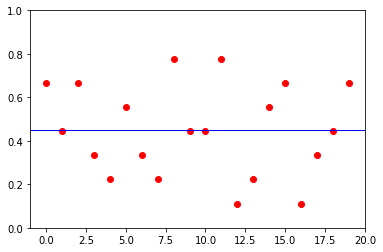

In [24]:
show(precision_3_v)

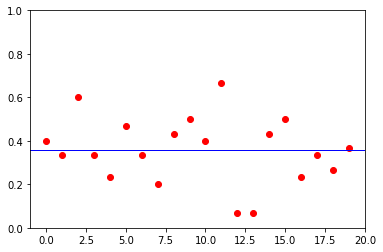

In [25]:
show(precision_10_v)

In [26]:
#Tabla de precisiones
d_v = {'Precision Exhaus 3':precision_3_v,'Precision Exhaus 10':precision_10_v}
df_v = pd.DataFrame(data=d_v,index=test_data.target_names)
df_v

,Precision Exhaus 3,Precision Exhaus 10
alt.atheism,0.666667,0.400000
comp.graphics,0.444444,0.333333
comp.os.ms-windows.misc,0.666667,0.600000
comp.sys.ibm.pc.hardware,0.333333,0.333333
comp.sys.mac.hardware,0.222222,0.233333
comp.windows.x,0.555556,0.466667
misc.forsale,0.333333,0.333333
rec.autos,0.222222,0.200000
rec.motorcycles,0.777778,0.433333
rec.sport.baseball,0.444444,0.500000


In [27]:
# Estadísticos principales
df_v.describe()

,Precision Exhaus 3,Precision Exhaus 10
count,20.000000,20.000000
mean,0.450000,0.358333
std,0.211664,0.155174
min,0.111111,0.066667
25%,0.305556,0.258333
50%,0.444444,0.350000
75%,0.666667,0.441667
max,0.777778,0.666667


#### Comentarios

DUDA: Habria que hablar de los dos niveles de exhaustividad por separado?

El valor de precisión varía muchísimo al cambiar de clase. Vemos que, por ejemplo, acierta muy poco con los documentos mostrados cuando la consulta es de clase 'sci.med' y que acierta mucho si la consulta es de 'sci.space'.

Un vistazo a los cuantiles nos permite ver que, con un nivel de exhaustividad 3, la mitad de las clases tienen más de un 0.6 de precisión y un 25% de las clases tienen más de un 0.77 de precisión, lo cual está francamente bien.

Al aumentar el nivel de exhaustividad a 10 las cosas cambian ligeramente: hay menos casos extremos, es decir, siempre acierta y falla alguno. También empeoran ligeramente los resultados: la mitad de las clases tienen más de un 0.38 de precisión y un 25% de las clases tienen más de un 0.59 de precisión.

DUDA: Esto puede deberse a? Que estan muy esparcidos y eso hace que sea probable fallar?

In [18]:
# Clase con peores resultados de precisión: 'sci.med'

def clases_confusion(nombre_clase,ranking):
    # Cogemos los rankings de las consultas de la clase pasada
    clase = test_data.target_names.index(nombre_clase)
    ranking_clase = ranking[clase]
    # Nos quedamos con los 2 primeros documentos del ranking para cada consulta
    lista_docs = [rank_consult[:2] for rank_consult in ranking_clase]
    # Pasamos de lista de listas a lista, guardamos sus clases y eliminamos repetidos
    set_clases = set([doc[1] for sublista in lista_docs for doc in sublista])
    # Cambiamos el numero de la clase por su nombre
    lista_nombre_clases = list(map(lambda i:test_data.target_names[i],set_clases))
    return lista_nombre_clases

print(clases_confusion('sci.med',vectorized_ranking))

['comp.graphics', 'comp.os.ms-windows.misc', 'misc.forsale', 'rec.sport.hockey', 'sci.crypt']


Vemos que la clase 'sci.med' se confunde habitualmente con las clases 'comp.graphics', 'comp.os.ms-windows.misc', 'misc.forsale', 'rec.sport.hockey' y 'sci.crypt'.
Este tipo de error significa que 'sci.med' no tiene características que permitan distinguir claramente, lo cual no quiere decir que las clases con las que se confundan tengan mala precisión. Estas podrían tener características que, de aparecer, no dejasen lugar a dudas de a que clase corresponde el texto.

DUDA: uff no tengo ni idea de qué decir

## Práctica 2.2.b

En esta parte de la práctica realizamos todos los cómputos (en concreto los relativos a la similitud de textos) con las variables train_data_vectorized y test_data_vectorized transformadas con **tf-idf**.

In [14]:
# Usamos los datos "train_data_vectorized" transformados con tf-idf
tfidfer = TfidfTransformer()
train_data_tfidf = tfidfer.fit_transform(train_data_vectorized)
test_data_tfidf = tfidfer.transform(test_data_vectorized)

In [18]:
precision_3_t  = precision_k_mas_similares(3, test_texts_idxs, test_data_tfidf, train_data_tfidf)
precision_10_t = precision_k_mas_similares(10, test_texts_idxs, test_data_tfidf, train_data_tfidf) 

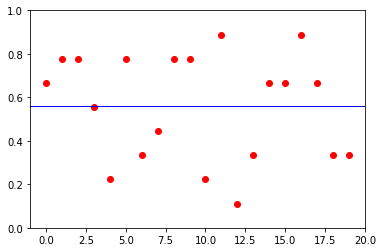

In [19]:
show(precision_3_v)

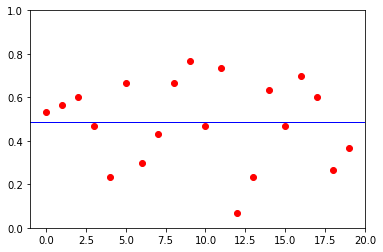

In [20]:
show(precision_10_v)

In [21]:
d_t = {'Precision Exhaus 3':precision_3_t,'Precision Exhaus 10':precision_10_t}
df_t = pd.DataFrame(data=d_t,index=test_data.target_names)
df_t

,Precision Exhaus 3,Precision Exhaus 10
alt.atheism,0.666667,0.533333
comp.graphics,0.777778,0.566667
comp.os.ms-windows.misc,0.777778,0.600000
comp.sys.ibm.pc.hardware,0.555556,0.466667
comp.sys.mac.hardware,0.222222,0.233333
comp.windows.x,0.777778,0.666667
misc.forsale,0.333333,0.300000
rec.autos,0.444444,0.433333
rec.motorcycles,0.777778,0.666667
rec.sport.baseball,0.777778,0.766667


In [22]:
df_t.describe()

,Precision Exhaus 3,Precision Exhaus 10
count,20.000000,20.000000
mean,0.561111,0.488333
std,0.245757,0.193543
min,0.111111,0.066667
25%,0.333333,0.350000
50%,0.666667,0.500000
75%,0.777778,0.641667
max,0.888889,0.766667


#### Comentarios

DUDA: no hace bien los enter si no es para nuevo párrafo, preguntar JC

Para nivel de exhaustividad 3, la media ha subido de un 0.539 a un 0.561, la desviación típica se mantiene similar, el primer cuantil ha mejorado de 0.33 a 0.41, la mediana ha empeorado de 0.61 a 0.55 y el tercer cuantil se mantiene. Esto quiere decir que los casos en los que había baja precisión han mejorado, pero en los que había alta se han mantenido estables.

Para nivel de exhaustividad 10, todo ha mejorado. Es especialmente notable que un 50% de las clases tienen más del 0.55 de precisión y un 25% de las clases tienen más del 0.675 de precisión, lo cual es muy positivo.

Nivel de exhaustividad 3:
Clases que han mejorado (7): 'comp.sys.ibm.pc.hardware', 'rec.autos', 'rec.sport.baseball', 'rec.sport.hockey', 'soc.religion.christian', 'talk.politics.guns', 'talk.politics.mideast'
Clases que han empeorado (8): 'comp.os.ms-windows.misc', 'comp.sys.mac.hardware', 'comp.windows.x', 'misc.forsale', 'rec.motorcycles', 'sci.electronics', 'sci.space', 'talk.politics.misc'
Clases que se mantienen (5): restantes

Nivel de exhaustividad 10:
Clases que han empeorado (2): 'alt.atheism', 'talk.politics.misc'
Clases que se mantienen (2): 'misc.forsale', 'talk.politics.mideast'
Clases que han mejorado (16): 'restantes'

In [25]:
#df_t - df_v

Hay un empate entre las dos clases que más han mejorado con nivel de exhaustividad 10, así que escogemos de esas la que más ha mejorado con nivel de exhaustividad 3: 'sci.crypt'.

Tf-idf significa term-frequency times inverse document-frequency, es decir, minimiza el impacto de términos con frecuencias muy altas (y seguramente no informativos) y aumenta el impacto de términos con poca frecuencia (pero que pueden ser, por ejemplo, tecnicismos).

Veamos qué ha pasado en el caso concreto de 'sci.crypt' mostrando las frecuencias antes y después de usar tf-idf.
Lo compararemos con 'rec.sport.hockey', cuya precisión aumentó 0.13 al usar tf-idf frente a los 0.2 de 'sci.crypt', con el objetivo de visualizar entre que valores oscilan las frecuencias tras pasar por el tf-idf.
Como es una matriz dispersa, mostramos los valores de la versión comprimida en un array para poder verlos todos.

In [26]:
num_clase = test_data.target_names.index('rec.sport.hockey')
print(test_data_vectorized[num_clase].data)
print()
print(np.flip(test_data_tfidf[num_clase].data))
# Las tuplas aparecian en orden inverso, de ahí el flip

[1 2 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 4 1 1 1 1 1 2 1 1 1 3 1 1 1
 1 1 1 1 1 1 1]

[0.09634314 0.12785479 0.10142332 0.07766332 0.10028107 0.10162125
 0.05531737 0.12881632 0.11303802 0.09903719 0.10329174 0.09649053
 0.08259555 0.12989615 0.14793198 0.07659876 0.08547652 0.19911877
 0.06789368 0.096197   0.06888689 0.07448095 0.09053712 0.09242015
 0.08800302 0.11840926 0.08299831 0.11642791 0.096197   0.1102043
 0.07811842 0.06471261 0.10894425 0.05587561 0.06216837 0.06485495
 0.09920951 0.16695768 0.15993586 0.12623671 0.06809356 0.08334125
 0.01737466 0.09649053 0.08077092 0.10243636 0.13743496 0.06433866
 0.01801596 0.08018382 0.16695768 0.10776971 0.08239763 0.06108132
 0.08516588 0.12005984 0.0512265  0.12125465 0.08547652 0.08981758
 0.34446016 0.06277025 0.08729244 0.10396219 0.11949199 0.11228495
 0.13141885 0.07415186 0.01731794 0.11949199 0.31188658 0.11156326
 0.04201735 0.13325853 0.05945

Vemos como las frecuencias cambian por completo a valores todos pequeños, premiando o castigando muchas palabras hasta el punto de que una palabra que antes tenía frecuencia menor que otra puede pasar a tener ahora más.

En el caso de 'rec.sport.hockey', vemos que por ejemplo sigue premiando la palabra que tiene 4 de frecuencia, pasándola a 0.34 (que ahora ya no es el cuádruple con respecto a las que tenían frecuencia 1, sino el triple (de media)) o el 3, que lo pasa a 0.31. Sin embargo, también castiga ciertas palabras, como el 2 entre el 4 y el 3, que pasa a valer 0.13, prácticamente como muchas palabras con frecuencia original 1.

In [27]:
num_clase = test_data.target_names.index('sci.crypt')
print(test_data_vectorized[num_clase].data)
print()
print(np.flip(test_data_tfidf[num_clase].data))

[1 2 1 1 1 1 1 1 2 1 1 1 1 1 1 1 3 1 1 1 1 1 1 1 1 3 1 1 1 2 1 1 1 1 3 1 1
 1 1 1 1 2 1 2 1 1 1 1 2 1 1 1 1]

[0.07269942 0.1485265  0.12300855 0.10819534 0.03547855 0.08756266
 0.09975685 0.11759424 0.30683187 0.09308108 0.12727706 0.12879612
 0.14571093 0.11426827 0.15965561 0.0932826  0.27442779 0.12727706
 0.094608   0.07191411 0.11759424 0.10505371 0.14396044 0.12185865
 0.1167098  0.22108298 0.20789628 0.08706094 0.14571093 0.13646903
 0.10791396 0.02018381 0.14313919 0.02092881 0.1503304  0.08964845
 0.09929647 0.11209124 0.0973873  0.1242282  0.10630367 0.14364195
 0.11805149 0.21963488 0.13419303 0.02011792 0.09789027 0.08571925
 0.31931122 0.09587276 0.15480393 0.11465516 0.03372234]


En el caso de 'sci.crypt', llama la atención la variación de ciertas palabras. La segunda palabra con una frecuencia original de 3 pasó a valer 0.221, prácticamente lo mismo que la palabra que tiene a continuación: pasó de 1 a 0.207. Son unos cambios que desde luego pueden repercurtir mucho en la similitud del coseno.
Sin embargo, parece que el motivo de la especial subida de este pueda ser que los mayores valores que se alcanzan, 0.3068 y 0.3193, se corresponden con la segunda y la última palabra que tenía valor 2, experimentando una enorme subida que supera incluso a los que tenían frecuencia 3 en este ejemplo y alcanzando casi a la palabra con frecuencia 4 del ejemplo anterior.
Sin duda esas serán palabra que aparezcan en muy pocos textos, y que gracias al tf-idf ahora pasan a ser determinante.